<a href="https://colab.research.google.com/github/jihandikaa/ProjectUAS---Data-Mining-Kelompok-5/blob/main/Project_Data_Mining_Kelompok_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Install dan Import Library**

*   NLTK

NLTK (Natural Language Toolkit) menyediakan berbagai macam fungsi dan alat yang dapat digunakan dalam pemrosesan bahasa alami.

*   Sastrawi

Sastrawi adalah library Python yang digunakan untuk melakukan stemming bahasa Indonesia. Stemming adalah proses menghilangkan imbuhan pada kata sehingga kata tersebut kembali ke kata dasar (root word). Misalnya, kata "memakan" akan diubah menjadi "makan" setelah melalui proses stemming.

*   Pandas

Pandas adalah library Python yang banyak digunakan untuk mengelola dan menganalisis data.

In [1]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 11.2 MB/s 


In [2]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import string 
import re
import matplotlib.pyplot as plt
import csv

In [3]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

##**Import Data CSV**

In [4]:
import warnings; warnings.simplefilter('ignore')

try:
    import google.colab; IN_COLAB = True
    print("Installing the required modules")
    !pip install --upgrade umap-learn
    !wget https://github.com/jihandikaa/ProjectUAS---Data-Mining-Kelompok-5/blob/main/Data_Twitter_Pildun.csv
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

Installing the required modules
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 1.8 MB/s 
     |████████████████████████████████| 1.1 MB 64.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=7a8839895daf4c07287c7fb1ef93d797039b3ce250066a07327c3759d40e0d7c
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=78326be92ebb0b89e2b71b70848df5d83206352f3a2227d79c009fb33ec26f4c
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent
--2022-12-30 04:16:19--  https://github.com/jihandikaa/ProjectUAS---Data-Mining-Kelompok-5/blob/main/Data_Twitter_Pildun.csv
Resolving github.com (github.com)... 140.82.121.4
Connec

In [5]:
url_data = (r'https://raw.githubusercontent.com/jihandikaa/ProjectUAS---Data-Mining-Kelompok-5/main/Data_Twitter_Pildun.csv')

In [6]:
df = pd.read_csv(url_data)
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1608137397375766529,1608137397375766529,2022-12-28 16:26:47 UTC,2022-12-28,16:26:47,0,1222927522033094656,idextratime,Extra Time Indonesia,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1608118257361518596,1608118257361518596,2022-12-28 15:10:44 UTC,2022-12-28,15:10:44,0,734582844685705218,58o94,★,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1608114838815010817,1608114838815010817,2022-12-28 14:57:09 UTC,2022-12-28,14:57:09,0,945591801330597892,harus_kamutahu,Harus kamu tahu,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1608112598410743814,1608112598410743814,2022-12-28 14:48:15 UTC,2022-12-28,14:48:15,0,740603423079288832,gusyusufchannel,Gus Yusuf Channel,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1608111124670709762,1608111124670709762,2022-12-28 14:42:24 UTC,2022-12-28,14:42:24,0,36205934,abuv_average88,Victoria Trice,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,1604539206076108802,1604539206076108802,2022-12-18 18:08:52 UTC,2022-12-18,18:08:52,0,142537012,adjie_djithuu,Aji Widayanto,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2655,1604539185859215361,1604539185859215361,2022-12-18 18:08:47 UTC,2022-12-18,18:08:47,0,926487776081539072,skandalmedia,#LawanPropaganda🏴⭐️SkandalMedia⭐️,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2656,1604539121526939649,1604539121526939649,2022-12-18 18:08:32 UTC,2022-12-18,18:08:32,0,288147069,haijoon_,karan⁷🌻 indigo 💙,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2657,1604539090158096384,1604539090158096384,2022-12-18 18:08:24 UTC,2022-12-18,18:08:24,0,1433831856986738690,andreasyona1601,Andre,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [7]:
# Menampilkan data dari table username dan tweet
df[['username', 'tweet']]

,username,tweet
0,idextratime,Qatar University mengumumkan kamar yang ditemp...
1,58o94,Puan Maharani berharap gelaran Piala Dunia 202...
2,harus_kamutahu,#youtube 8 stadion mewah dan canggih Piala Dun...
3,gusyusufchannel,"KH. Chudlori, Gus Dur dan Piala Dunia Qatar 20..."
4,abuv_average88,Puan Maharani berharap gelaran Piala Dunia 202...
...,...,...
2654,adjie_djithuu,Final sangat istimewa Piala Dunia Qatar 2022. ...
2655,skandalmedia,😎 akhirnya tumbang juga pendukung pelangi bute...
2656,haijoon_,Digadang jadi piala dunia paling sunyi karna b...
2657,andreasyona1601,Selamat kepada Argentina atas kemenangannya di...


#**Text Preprocessing**

Text preprocessing adalah suatu proses untuk menyeleksi data text agar menjadi lebih terstruktur lagi dengan melalui serangkaian tahapan yang meliputi tahapan text, cleaning, case folding, tokenizing, stopword dan stemming.

## **Text Cleaning**
Proses membersihkan
dokumen dari komponen-komponen
yang tidak memiliki hubungan dengan
informasi yang ada pada dokumen,
seperti tag html, link, emoji, angka, dll.

In [8]:
def remove_char_special(text):
    # menghapus tab dan baris baru
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus emoticon 
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, dan hastag
    text = ' '.join(re.sub("([@#][A-Za-z]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus url
    return text.replace("http://", " ").replace("https://", " ")    

def remove_punctuation(text):
    return text.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))

def remove_number(text):
    return re.sub(r"[0-9]", "", text)   

def remove_whitespace(text):
    return text.strip()

def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)


Dari code diatas, dilakukan:
1. Penghapusan tab dan baris baru

2. Penghapusan emoticon.

3. Penghapusan mention, link, dan hastag. 

4. Penghapusan url.

Fungsi ini berguna untuk membersihkan tweet sebelum dilakukan analisis terhadap tweet tersebut. Dengan membersihkan tweet terlebih dahulu, hasil analisis akan lebih akurat karena tidak terdistorsi oleh tanda baca, karakter lain, dan sebagainya.

In [9]:
df['data_bersih'] = df['tweet']

In [10]:
df['data_bersih'] = df['data_bersih'].apply(remove_char_special)  
df['data_bersih'] = df['data_bersih'].apply(remove_punctuation) 
df['data_bersih'] = df['data_bersih'].apply(remove_number)
df['data_bersih'] = df['data_bersih'].apply(remove_whitespace)
df['data_bersih'] = df['data_bersih'].apply(remove_whitespace_multiple)

**Perbedaan sebelum dan sesudah text cleaning**

In [11]:
df[['tweet','data_bersih']]

,tweet,data_bersih
0,Qatar University mengumumkan kamar yang ditemp...,Qatar University mengumumkan kamar yang ditemp...
1,Puan Maharani berharap gelaran Piala Dunia 202...,Puan Maharani berharap gelaran Piala Dunia yan...
2,#youtube 8 stadion mewah dan canggih Piala Dun...,stadion mewah dan canggih Piala Dunia Qatar Ib...
3,"KH. Chudlori, Gus Dur dan Piala Dunia Qatar 20...",KH Chudlori Gus Dur dan Piala Dunia Qatar Gus ...
4,Puan Maharani berharap gelaran Piala Dunia 202...,Puan Maharani berharap gelaran Piala Dunia yan...
...,...,...
2654,Final sangat istimewa Piala Dunia Qatar 2022. ...,Final sangat istimewa Piala Dunia Qatar Selama...
2655,😎 akhirnya tumbang juga pendukung pelangi bute...,akhirnya tumbang juga pendukung pelangi butex ...
2656,Digadang jadi piala dunia paling sunyi karna b...,Digadang jadi piala dunia paling sunyi karna b...
2657,Selamat kepada Argentina atas kemenangannya di...,Selamat kepada Argentina atas kemenangannya di...


##**1. Case Folding**

Digunakan untuk menyamaratakan huruf kecil dan huruf kapital agar lebih mudah dianalisis. Akan dilakukan pengubahan huruf kapital menjadi huruf kecil.

In [12]:
df['data_lower'] = df['data_bersih'].str.lower()

**Perbedaan sebelum dan sesudah case folding**

In [13]:
df[["data_bersih", "data_lower"]]

,data_bersih,data_lower
0,Qatar University mengumumkan kamar yang ditemp...,qatar university mengumumkan kamar yang ditemp...
1,Puan Maharani berharap gelaran Piala Dunia yan...,puan maharani berharap gelaran piala dunia yan...
2,stadion mewah dan canggih Piala Dunia Qatar Ib...,stadion mewah dan canggih piala dunia qatar ib...
3,KH Chudlori Gus Dur dan Piala Dunia Qatar Gus ...,kh chudlori gus dur dan piala dunia qatar gus ...
4,Puan Maharani berharap gelaran Piala Dunia yan...,puan maharani berharap gelaran piala dunia yan...
...,...,...
2654,Final sangat istimewa Piala Dunia Qatar Selama...,final sangat istimewa piala dunia qatar selama...
2655,akhirnya tumbang juga pendukung pelangi butex ...,akhirnya tumbang juga pendukung pelangi butex ...
2656,Digadang jadi piala dunia paling sunyi karna b...,digadang jadi piala dunia paling sunyi karna b...
2657,Selamat kepada Argentina atas kemenangannya di...,selamat kepada argentina atas kemenangannya di...


##**2. Text Normalization: Slang Words**

Dilakukan untuk mengubah kata-kata slang atau gaul dalam teks menjadi bentuk yang lebih mudah dianalisis.

In [14]:
!wget https://raw.githubusercontent.com/jihandikaa/ProjectUAS---Data-Mining-Kelompok-5/main/slang.txt -O slang.txt

--2022-12-30 04:16:20--  https://raw.githubusercontent.com/jihandikaa/ProjectUAS---Data-Mining-Kelompok-5/main/slang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1869 (1.8K) [text/plain]
Saving to: ‘slang.txt’

slang.txt           100%[===================>]   1.83K  --.-KB/s    in 0s      

2022-12-30 04:16:20 (31.1 MB/s) - ‘slang.txt’ saved [1869/1869]



In [15]:
fSlang = 'slang.txt'
bahasa = 'id'
sw=open(fSlang,encoding='utf-8', errors='ignore', mode='r');SlangS=sw.readlines();sw.close()
SlangS = {slang.strip().split(':')[0]:slang.strip().split(':')[1] for slang in SlangS}

In [16]:
# List slang
SlangS

{'bbrp': 'beberapa',
 'gud': 'bagus',
 'laen': 'lain',
 'nich': 'ini',
 'gk': 'tidak',
 'baguss': 'bagus',
 'bgt': 'banget',
 'spy': 'supaya',
 'trima': 'terima',
 'nyampe': 'sampai',
 'make': 'pakai',
 'mendonlod': 'mengunduh',
 'lbh': 'lebih',
 'gini': 'begini',
 'lg': 'lagi',
 'ok': 'oke',
 'permbayaran': 'pembayaran',
 'min': 'admin',
 'trmkasih': 'terima kasih',
 'pantes': 'pantas',
 'sy': 'saya',
 'bs': 'bisa',
 'pdhl': 'padahal',
 'smpai': 'sampai',
 'brp': 'berapa',
 'pasword': 'password',
 'paoword': 'password',
 'refeera': 'referal',
 'ngaktifin': 'aktifin',
 'applikasi': 'aplikasi',
 'byar': 'bayar',
 'bajet': 'biaya',
 'aj': 'saja',
 'rp': 'rupiah',
 'brhasil': 'berhasil',
 'kpotong': 'kepotong',
 'kmana': 'kemana',
 'bgttt': 'banget',
 'sampek': 'sampai',
 'gada': 'tidak ada',
 'lbih': 'lebih',
 'hrus': 'harus',
 'ngak': 'tidak',
 'tp': 'tapi',
 'sja': 'saja',
 'utuk': 'untuk',
 'jt': 'juta',
 'maintence': 'maintenance',
 'passwors': 'password',
 'androit': 'android',
 'ma

In [17]:
def slang(t):
  t = word_tokenize(t)
  for i, x in enumerate(t):
    if x in SlangS.keys():
      t[i] = SlangS[x]
  return ''.join(' '.join(x for x in t if x not in ""))

In [18]:
data = [x for x in df['data_lower']]

In [19]:
replace_slangs = list(map(slang, data)) 

In [20]:
df['data_setelah_slang'] = replace_slangs

##**Tokenize**
Digunakan untuk memisahkan teks menjadi potongan-potongan berupa token, misalnya berupa potongan huruf, kata, atau kalimat.

In [21]:
df['data_token'] = df['data_setelah_slang'].apply(nltk.word_tokenize)

In [22]:
df[['data_setelah_slang','data_token']]

,data_setelah_slang,data_token
0,qatar university mengumumkan kamar yang ditemp...,"[qatar, university, mengumumkan, kamar, yang, ..."
1,puan maharani berharap gelaran piala dunia yan...,"[puan, maharani, berharap, gelaran, piala, dun..."
2,stadion mewah dan canggih piala dunia qatar ib...,"[stadion, mewah, dan, canggih, piala, dunia, q..."
3,kh chudlori gus dur dan piala dunia qatar gus ...,"[kh, chudlori, gus, dur, dan, piala, dunia, qa..."
4,puan maharani berharap gelaran piala dunia yan...,"[puan, maharani, berharap, gelaran, piala, dun..."
...,...,...
2654,final sangat istimewa piala dunia qatar selama...,"[final, sangat, istimewa, piala, dunia, qatar,..."
2655,akhirnya tumbang juga pendukung pelangi butex ...,"[akhirnya, tumbang, juga, pendukung, pelangi, ..."
2656,digadang jadi piala dunia paling sunyi karna b...,"[digadang, jadi, piala, dunia, paling, sunyi, ..."
2657,selamat kepada argentina atas kemenangannya di...,"[selamat, kepada, argentina, atas, kemenangann..."


### **Melihat Frekuensi Kata**

In [23]:
list_to_text = ' '.join([i for i in df['data_setelah_slang']])

In [24]:
tokenized_words = nltk.tokenize.word_tokenize(list_to_text)

In [25]:
frekuensi_tokens = nltk.FreqDist(tokenized_words)
print('Frekuensi Tokens : \n') 
print (frekuensi_tokens.most_common())

Frekuensi Tokens : 

[('dunia', 2797), ('piala', 2728), ('qatar', 2204), ('di', 1398), ('argentina', 1158), ('yang', 739), ('juara', 677), ('messi', 660), ('dan', 572), ('final', 420), ('dari', 344), ('ini', 329), ('prancis', 325), ('lionel', 310), ('stadion', 281), ('menjadi', 255), ('dengan', 237), ('terbaik', 227), ('untuk', 208), ('jadi', 202), ('timnas', 194), ('pemain', 191), ('fifa', 177), ('usai', 172), ('pada', 172), ('setelah', 168), ('mbappe', 167), ('sebagai', 165), ('selamat', 161), ('tahun', 152), ('dalam', 152), ('cup', 145), ('bola', 142), ('gol', 141), ('world', 136), ('trofi', 132), ('yg', 129), ('berhasil', 128), ('ada', 126), ('adu', 126), ('sudah', 121), ('tim', 119), ('pertandingan', 116), ('itu', 115), ('ke', 115), ('dibuat', 110), ('bahan', 108), ('bekas', 108), ('mewah', 103), ('canggih', 103), ('penalti', 102), ('telah', 99), ('kemenangan', 97), ('negara', 95), ('bisa', 94), ('indonesia', 92), ('sepak', 92), ('desember', 86), ('juga', 86), ('gelar', 84), ('tid

##**3. Text Level Normalization: StopWords**

Digunakan untuk menghilangkan stopwords (kata yang sering muncul dalam teks) tetapi tidak memiliki arti.


In [26]:
from nltk.corpus import stopwords

In [27]:
!wget https://raw.githubusercontent.com/jihandikaa/ProjectUAS---Data-Mining-Kelompok-5/main/stopword.txt -O stopword.txt

--2022-12-30 04:16:22--  https://raw.githubusercontent.com/jihandikaa/ProjectUAS---Data-Mining-Kelompok-5/main/stopword.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7203 (7.0K) [text/plain]
Saving to: ‘stopword.txt’

stopword.txt        100%[===================>]   7.03K  --.-KB/s    in 0s      

2022-12-30 04:16:22 (60.0 MB/s) - ‘stopword.txt’ saved [7203/7203]



In [28]:
list_stopwords = stopwords.words('indonesian')

txt_stopword = pd.read_csv("stopword.txt", names= ["stopwords"], header = None)

# Convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))


list_stopwords.extend(["tq","yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah','hr','rb'])


# Convert list to dictionary
list_stopwords = set(list_stopwords)

# Remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

In [29]:
df['data_stopwords'] = df['data_token'].apply(stopwords_removal) 

df[['data_token','data_stopwords']]

,data_token,data_stopwords
0,"[qatar, university, mengumumkan, kamar, yang, ...","[qatar, university, mengumumkan, kamar, ditemp..."
1,"[puan, maharani, berharap, gelaran, piala, dun...","[puan, maharani, berharap, gelaran, piala, dun..."
2,"[stadion, mewah, dan, canggih, piala, dunia, q...","[stadion, mewah, canggih, piala, dunia, qatar,..."
3,"[kh, chudlori, gus, dur, dan, piala, dunia, qa...","[kh, chudlori, gus, dur, piala, dunia, qatar, ..."
4,"[puan, maharani, berharap, gelaran, piala, dun...","[puan, maharani, berharap, gelaran, piala, dun..."
...,...,...
2654,"[final, sangat, istimewa, piala, dunia, qatar,...","[final, istimewa, piala, dunia, qatar, selamat..."
2655,"[akhirnya, tumbang, juga, pendukung, pelangi, ...","[tumbang, pendukung, pelangi, butex, en, islam..."
2656,"[digadang, jadi, piala, dunia, paling, sunyi, ...","[digadang, piala, dunia, sunyi, karna, kontrov..."
2657,"[selamat, kepada, argentina, atas, kemenangann...","[selamat, argentina, kemenangannya, piala, dun..."


**Menghapus list yang kosong dari kolom data_stopwords**

In [30]:
df = df[df.astype(str)['data_stopwords'] != '[]']

In [31]:
df[['data_token','data_stopwords']]

,data_token,data_stopwords
0,"[qatar, university, mengumumkan, kamar, yang, ...","[qatar, university, mengumumkan, kamar, ditemp..."
1,"[puan, maharani, berharap, gelaran, piala, dun...","[puan, maharani, berharap, gelaran, piala, dun..."
2,"[stadion, mewah, dan, canggih, piala, dunia, q...","[stadion, mewah, canggih, piala, dunia, qatar,..."
3,"[kh, chudlori, gus, dur, dan, piala, dunia, qa...","[kh, chudlori, gus, dur, piala, dunia, qatar, ..."
4,"[puan, maharani, berharap, gelaran, piala, dun...","[puan, maharani, berharap, gelaran, piala, dun..."
...,...,...
2654,"[final, sangat, istimewa, piala, dunia, qatar,...","[final, istimewa, piala, dunia, qatar, selamat..."
2655,"[akhirnya, tumbang, juga, pendukung, pelangi, ...","[tumbang, pendukung, pelangi, butex, en, islam..."
2656,"[digadang, jadi, piala, dunia, paling, sunyi, ...","[digadang, piala, dunia, sunyi, karna, kontrov..."
2657,"[selamat, kepada, argentina, atas, kemenangann...","[selamat, argentina, kemenangannya, piala, dun..."


##**4. Stemming**

Digunakan untuk menghilangkan imbuhan pada akhir kata agar lebih mudah dianalisis. 

In [32]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [33]:
def stemmed(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['data_stopwords']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")

4960
------------------------
qatar : qatar
university : university
mengumumkan : umum
kamar : kamar
ditempati : tempat
lionel : lionel
messi : messi
gelaran : gelar
piala : piala
dunia : dunia
diubah : ubah
museum : museum
mini : mini
kampus : kampus
kamp : kamp
timnas : timnas
argentina : argentina
kemarin : kemarin
puan : puan
maharani : maharani
berharap : harap
berjalan : jalan
lancar : lancar
harapan : harap
rakyat : rakyat
stadion : stadion
mewah : mewah
canggih : canggih
sri : sri
mulyani : mulyani
mama : mama
awards : awards
kh : kh
chudlori : chudlori
gus : gus
dur : dur
ch : ch
youtube : youtube
kylian : kylian
mbappe : mbappe
bangkit : bangkit
gagal : gagal
doooooooong : doooooooong
admin : admin
saksi : saksi
bisu : bisu
disulap : sulap
pengelola : kelola
mess : mess
basecamp : basecamp
menjadikan : jadi
leo : leo
yup : yup
gambaran : gambar
sejarah : sejarah
kabarnya : kabar
barat : barat
fenomena : fenomena
orang : orang
beli : beli
bidet : bidet
semprotan : semprot
pula

In [34]:
# Fungsi untuk mengaplikasikan hasil stemming ke dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

In [35]:
df['data_stemming'] = df['data_stopwords'].apply(get_stemmed_term)

In [36]:
df['data_text_bersih'] = df['data_stemming'].apply(lambda x: ' '.join(x))

In [37]:
df[['data_stopwords','data_stemming','data_text_bersih']]

,data_stopwords,data_stemming,data_text_bersih
0,"[qatar, university, mengumumkan, kamar, ditemp...","[qatar, university, umum, kamar, tempat, lione...",qatar university umum kamar tempat lionel mess...
1,"[puan, maharani, berharap, gelaran, piala, dun...","[puan, maharani, harap, gelar, piala, dunia, q...",puan maharani harap gelar piala dunia qatar ja...
2,"[stadion, mewah, canggih, piala, dunia, qatar,...","[stadion, mewah, canggih, piala, dunia, qatar,...",stadion mewah canggih piala dunia qatar sri mu...
3,"[kh, chudlori, gus, dur, piala, dunia, qatar, ...","[kh, chudlori, gus, dur, piala, dunia, qatar, ...",kh chudlori gus dur piala dunia qatar gus ch y...
4,"[puan, maharani, berharap, gelaran, piala, dun...","[puan, maharani, harap, gelar, piala, dunia, q...",puan maharani harap gelar piala dunia qatar ja...
...,...,...,...
2654,"[final, istimewa, piala, dunia, qatar, selamat...","[final, istimewa, piala, dunia, qatar, selamat...",final istimewa piala dunia qatar selamat argen...
2655,"[tumbang, pendukung, pelangi, butex, en, islam...","[tumbang, dukung, pelangi, butex, en, islamoph...",tumbang dukung pelangi butex en islamophobia n...
2656,"[digadang, piala, dunia, sunyi, karna, kontrov...","[gadang, piala, dunia, sunyi, karna, kontrover...",gadang piala dunia sunyi karna kontroversi pia...
2657,"[selamat, argentina, kemenangannya, piala, dun...","[selamat, argentina, menang, piala, dunia, qatar]",selamat argentina menang piala dunia qatar


##**Menyimpan data setelah text preprocessing**

In [38]:
filename = 'Data_Twitter_Bersih.csv'
df.to_csv(filename, index=False)

# **Visualisasi Frekuensi Kata**

Dilakukan visualisasi frekuensi keseluruhan kata menggunakan wordcloud. Kemudian dilakukan pemisahan visualisasi frekuensi kata menjadi positif dan negatif, untuk mengetahui jumlah kata dari masing-masing sentimen menggunakan wordcloud dan bar chart.

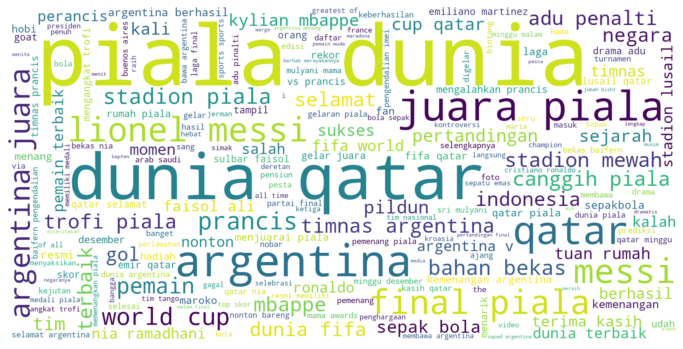

In [39]:
# Menampilkan keseluruhan frekuensi kata hasil dari text processing dengan wordcloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, stopwords=list_stopwords, background_color="white").generate(list_to_text)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud
10 Kata teratas yang paling sering digunakan adalah:
 "piala dunia"
 "dunia qatar"
 "argentina"
 "juara piala"
 "qatar"
 "final piala"
 "lioner messi"
 "messi"
 "argentina juara"
 "prancis"

#**Labelling Data**

In [40]:
!wget https://raw.githubusercontent.com/jihandikaa/ProjectUAS---Data-Mining-Kelompok-5/main/Data_Twitter_Pildun_Bersih.csv -O Data_Twitter_Pildun_Bersih.csv
!wget https://raw.githubusercontent.com/jihandikaa/ProjectUAS---Data-Mining-Kelompok-5/main/lexicon_negative.csv -O lexicon_negative.csv
!wget https://raw.githubusercontent.com/jihandikaa/ProjectUAS---Data-Mining-Kelompok-5/main/lexicon_positive.csv -O lexicon_positive.csv

--2022-12-30 04:21:20--  https://raw.githubusercontent.com/jihandikaa/ProjectUAS---Data-Mining-Kelompok-5/main/Data_Twitter_Pildun_Bersih.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187984 (184K) [text/plain]
Saving to: ‘Data_Twitter_Pildun_Bersih.csv’

Data_Twitter_Pildun 100%[===================>] 183.58K  --.-KB/s    in 0.01s   

2022-12-30 04:21:20 (17.5 MB/s) - ‘Data_Twitter_Pildun_Bersih.csv’ saved [187984/187984]

--2022-12-30 04:21:20--  https://raw.githubusercontent.com/jihandikaa/ProjectUAS---Data-Mining-Kelompok-5/main/lexicon_negative.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.1

In [41]:
tweets = []

with open('Data_Twitter_Bersih.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    tweet= dict()
    tweet['tweet_bersih'] = row[42]
    tweets.append(tweet)

In [42]:
lexicon_positive = dict()
lexicon_negative = dict()

In [43]:
# Membaca file CSV 'lexicon.csv' dan menyimpan isinya ke dalam dictionary 'lexicon_positive
with open('lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

with open('lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

In [44]:
for tweet in tweets:
    score = 0
    for word in tweet['tweet_bersih'].split(): 
        if word in lexicon_positive:
            score = score + lexicon_positive[word]

    for word in tweet['tweet_bersih'].split():
        if word in lexicon_negative:
            score = score + lexicon_negative[word]

    tweet['score'] = score
    if (score > 0):
        tweet['sentiment'] = 'positive'
    elif (score < 0):
        tweet['sentiment'] = 'negative'
    else:
        tweet['sentiment'] = 'neutral'

In [45]:
tweets

[{'tweet_bersih': 'data_text_bersih', 'score': 0, 'sentiment': 'neutral'},
 {'tweet_bersih': 'qatar university umum kamar tempat lionel messi gelar piala dunia ubah museum mini kampus kamp timnas argentina piala dunia kemarin',
  'score': -2,
  'sentiment': 'negative'},
 {'tweet_bersih': 'puan maharani harap gelar piala dunia qatar jalan lancar puan harap rakyat',
  'score': 3,
  'sentiment': 'positive'},
 {'tweet_bersih': 'stadion mewah canggih piala dunia qatar sri mulyani mama awards',
  'score': 3,
  'sentiment': 'positive'},
 {'tweet_bersih': 'kh chudlori gus dur piala dunia qatar gus ch youtube',
  'score': -1,
  'sentiment': 'negative'},
 {'tweet_bersih': 'puan maharani harap gelar piala dunia qatar jalan lancar puan harap rakyat',
  'score': 3,
  'sentiment': 'positive'},
 {'tweet_bersih': 'puan maharani harap gelar piala dunia qatar jalan lancar puan harap rakyat',
  'score': 3,
  'sentiment': 'positive'},
 {'tweet_bersih': 'puan maharani harap gelar piala dunia qatar jalan la

##**Mengubah hasil tweets menjadi dataframe**

In [46]:
datas = pd.DataFrame.from_dict(tweets)

In [47]:
print(datas['sentiment'].value_counts())

negative    1387
positive    1014
neutral      255
Name: sentiment, dtype: int64


#**Modelling**

In [48]:
datas.head()

,tweet_bersih,score,sentiment
0,data_text_bersih,0,neutral
1,qatar university umum kamar tempat lionel mess...,-2,negative
2,puan maharani harap gelar piala dunia qatar ja...,3,positive
3,stadion mewah canggih piala dunia qatar sri mu...,3,positive
4,kh chudlori gus dur piala dunia qatar gus ch y...,-1,negative


In [49]:
# Menambahkan library untuk menghitung tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

# Memanggil library TfidfVectorizer
vectorizer = TfidfVectorizer()

# Konversi teks menjadi vektor menggunakn fit_transform
X = vectorizer.fit_transform(datas['tweet_bersih'].values.astype('U'))

# Membuat label untuk modelling
y = datas['sentiment']

## **Membuat model dan evaluasi menggunakan Multinominal Naive Bayes**
Tahap ini merupakan tahap membuat model dan evaluasi. Model yang digunakan adalah Multinomial Naive Bayes yang biasa digunakan dalam klasifikasi teks. 

Pada tahap ini dilakukan:
* Membagi data train dan dan test menjadi 80% dan 20%.
* Membuat model Multinomial Naive Bayes.
* Menampilkan confusion matrix, nilai akurasi, recall, dan f1-score.

In [50]:
# Membagi data training dan data testing (20% data testing dan 80% data training)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [51]:
# Menambahkan model library Multinomial Naive Bayes, confusion matrix, dan nilai akurasi
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

# Memanggil fungsi klasifikasi Naive bayes dan Memasukkan data training pada model
clf = LinearSVC().fit(X_train, y_train)
predicted = clf.predict(X_test)

# Mengukur keberhasilan program menggunakan confusion matrix dan nilai akurasi
cm = (confusion_matrix(y_test, predicted))
ac = (accuracy_score(y_test, predicted))

In [52]:
# Menampilkan confusion matrix
cm

array([[252,   1,  22],
       [ 26,  20,  16],
       [ 27,   2, 166]])

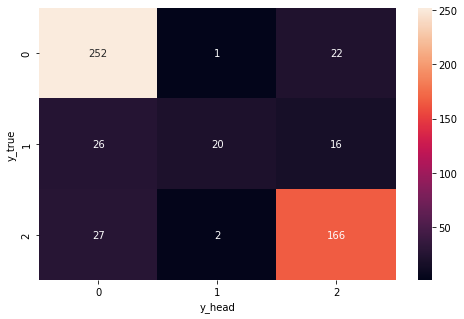

In [53]:
# Menampilkan visualisasi confusion matrix menggunakan library matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [54]:
# Menampilkan nilai akurasi
print('nilai akurasi modelnya adalah :', ac)

nilai akurasi modelnya adalah : 0.8233082706766918


In [55]:
# Menghitung nilai akurasi dari klasifikasi naive bayes 
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

    negative       0.83      0.92      0.87       275
     neutral       0.87      0.32      0.47        62
    positive       0.81      0.85      0.83       195

    accuracy                           0.82       532
   macro avg       0.84      0.70      0.72       532
weighted avg       0.83      0.82      0.81       532



# **Visualisasi**


In [56]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

In [57]:
# Memisahkan dataframe menjadi dua, yaitu data dengan label positif dan negatif
df_positif = datas[datas['sentiment'] == 'positive']
df_negatif = datas[datas['sentiment'] == 'negative']
df_neutral = datas[datas['sentiment'] == 'neutral']

In [58]:
# Menggabungkan semua tweet dengan label positif menjadi satu string
all_positif = ' '.join(df_positif['tweet_bersih'])

# Menggabungkan semua tweet dengan label negatif menjadi satu string
all_negatif = ' '.join(df_negatif['tweet_bersih'])

# Menggabungkan semua tweet dengan label neutral menjadi satu string
all_neutral = ' '.join(df_neutral['tweet_bersih'])

POSITIF



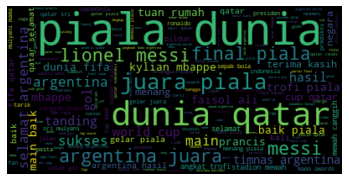


Negatif


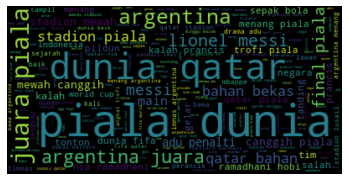


Neutral


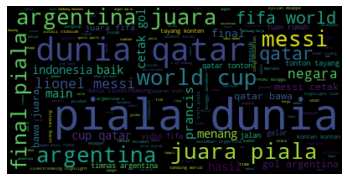

In [59]:
# Membuat wordcloud dari string positif
print('POSITIF\n')
wordcloud = WordCloud().generate(all_positif)

# Menampilkan wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Membuat wordcloud dari string negatif
print('\nNegatif')
wordcloud = WordCloud().generate(all_negatif)

# Menampilkan wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Membuat wordcloud dari string negatif
wordcloud = WordCloud().generate(all_neutral)

# Menampilkan wordcloud
print('\nNeutral')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Hasil Sentiment Analysis Positif**

Dari 2659 data, hasil data yang positif sebesar 987. Dan 10 Kata teratas dari sentiment analysist positif  yang paling sering digunakan adalah:
 "piala dunia"
 "dunia qatar"
 "juara piala"
 "messi"
 "argentina juara"
 "lionel messi"
 "final piala"
 "selamat argentina"
 "timnas argentina"
 "world cup"

**Hasil Sentiment Analysis Negatif**

Dari 2659 data, hasil data yang positif sebesar 1414. Dan 10 Kata teratas dari sentiment analysist negatif  yang paling sering digunakan adalah:
 "piala dunia"
 "dunia qatar"
 "juara piala"
 "argentina"
 "argentina juara"
 "final piala"
 "lionel messi"
 "stadion piala"
 "messi"
 "adu pinalti"

**Hasil Sentiment Analysis Neutral**

Dari 2659 data, hasil data yang netral sebesar 255 Dan 10 Kata teratas dari sentiment analysist netral  yang paling sering digunakan adalah:
 "piala dunia"
 "dunia qatar"
 "world cup"
 "argentina juara"
 "argentina"
 "messi"
 "juara piala"
 "qatar"
 "final piala"
 "fifa world"
 

In [60]:
import networkx as nx

In [61]:
data = (r'https://raw.githubusercontent.com/jihandikaa/ProjectUAS---Data-Mining-Kelompok-5/main/Data_Twitter_Pildun.csv')

In [62]:
df = pd.read_csv(url_data)
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1608137397375766529,1608137397375766529,2022-12-28 16:26:47 UTC,2022-12-28,16:26:47,0,1222927522033094656,idextratime,Extra Time Indonesia,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1608118257361518596,1608118257361518596,2022-12-28 15:10:44 UTC,2022-12-28,15:10:44,0,734582844685705218,58o94,★,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1608114838815010817,1608114838815010817,2022-12-28 14:57:09 UTC,2022-12-28,14:57:09,0,945591801330597892,harus_kamutahu,Harus kamu tahu,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1608112598410743814,1608112598410743814,2022-12-28 14:48:15 UTC,2022-12-28,14:48:15,0,740603423079288832,gusyusufchannel,Gus Yusuf Channel,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1608111124670709762,1608111124670709762,2022-12-28 14:42:24 UTC,2022-12-28,14:42:24,0,36205934,abuv_average88,Victoria Trice,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,1604539206076108802,1604539206076108802,2022-12-18 18:08:52 UTC,2022-12-18,18:08:52,0,142537012,adjie_djithuu,Aji Widayanto,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2655,1604539185859215361,1604539185859215361,2022-12-18 18:08:47 UTC,2022-12-18,18:08:47,0,926487776081539072,skandalmedia,#LawanPropaganda🏴⭐️SkandalMedia⭐️,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2656,1604539121526939649,1604539121526939649,2022-12-18 18:08:32 UTC,2022-12-18,18:08:32,0,288147069,haijoon_,karan⁷🌻 indigo 💙,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2657,1604539090158096384,1604539090158096384,2022-12-18 18:08:24 UTC,2022-12-18,18:08:24,0,1433831856986738690,andreasyona1601,Andre,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


# **SNA**

In [63]:
users = df.username.to_list()
tweets = df.tweet.to_list()

In [64]:
G = nx.Graph() # Graph Kosong Baru
G.add_nodes_from(users)

In [65]:
print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  1284
Banyak Edges =  0


In [66]:
for usr, t in zip(users, tweets):
    mentionS =  re.findall("@([a-zA-Z0-9]{1,15})", t)
    for mention in mentionS:
        if "." not in mention: #skipping emails
            G.add_edge(usr, mention)
            
print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())
print("Export ke GexF untuk di import ke Gephi")
nx.write_gexf(G, "Pildun.gexf")

Banyak vertex =  1437
Banyak Edges =  311
Export ke GexF untuk di import ke Gephi


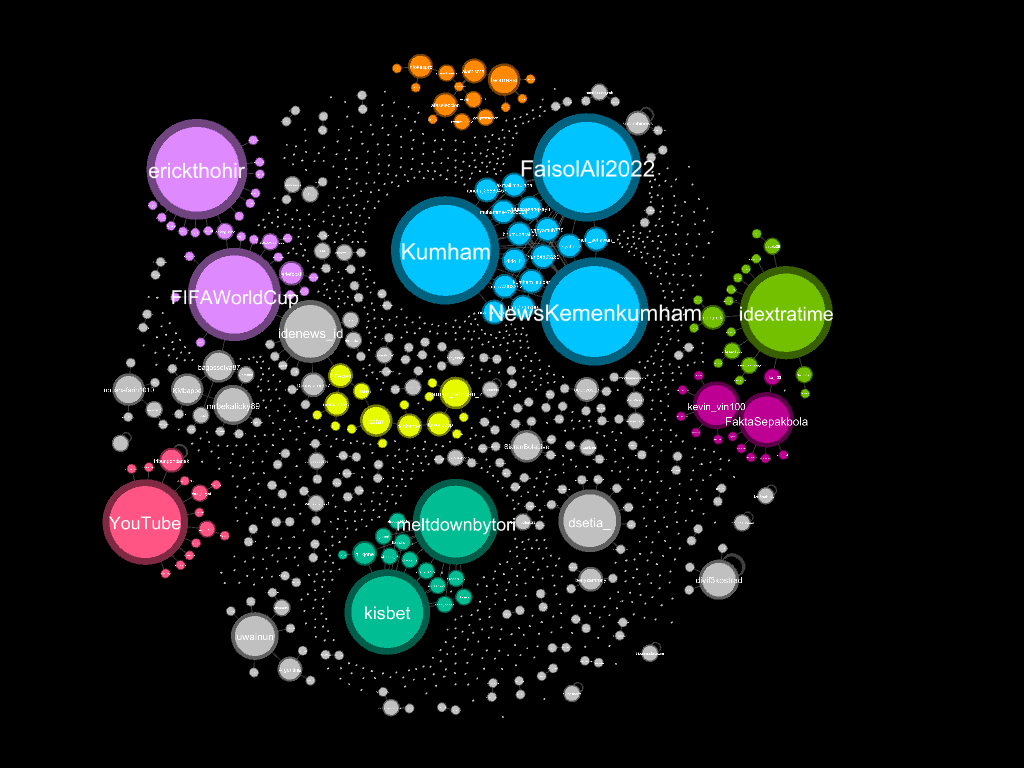

**Hasil Social Network Analysis**

GEPHI
Jumlah vertex/nodes = 1437
Jumlah edges = 311

Akun dengan degree terbesar: @idextratime

6 akun paling populer adalah:
@NewsKemenkummham
@Kumham
@FaisolAli2022
@erickthohir
@FIFAWorldCup
@idextratime


Dapat dilihat bahwa pada perbincangan Piala Dunia Qatar 2022 yang menjadi user yang paling berpengaruh atau centralizer adalah
@NewsKemenkummham
@Kumham
@FaisolAli2022
@erickthohir
@FIFAWorldCup
@idextratime

Namun ketika dianalisis lebih lanjut pemilik akun twitter bernama NewsKemenkummham, Kumham, FaisolAli2022 yang saling berinteraksi satu sama lain terdeksi adalah akun "bot,” “spam”, atau “akun palsu,”. Sehingga interaksi yang terjadi antar user tidak asli.
Dilihat dari pemilik akun twitter bernama erickthohir merupakan menteri BUMN yang sering membahas konten-konten (tweets) yang bersifat pro terhadap Pildun
Dilihat dari pemilik akun twitter bernama FIFAWorldCup merupakan akun verified Federasi Sepak Bola Internasional yang menyebarkan informasi  : Lebih sering membahas konten-konten (tweets) yang bersifat 
Dilihat dari pemilik akun twitter bernama FIFAWorldCup merupakan akun
